Noah Ball

In [22]:
#common imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
import datetime
from matplotlib import pyplot

fileName = "customer_data_2021.csv"

df = pd.read_csv("customer_data_2021.csv")

Data Exploration and Cleaning

In [23]:
df.head()


,Unnamed: 0,CompanyID,IsConverted,ConvertedDate,Country,CreatedDate,DomainType,NumberOfEmployees,EstimatedAnnualRevenue,NumberofOpenings,...,StatusReason,VisitWebpageCount,FillOutFormCount,ClickLinkCount,OpenEmailCount,ClickEmailCount,FillOutFacebookLeadAdsFormCount,FillOutLinkedInLeadGenFormCount,EmailBouncedCount,UnsubscribeEmailCount
0,0,66930d33c4c3f4cd46de9b34a73bed4e,0,NaN,United States,2021-01-01T19:04:06.000+0000,Business,49.0,$0-$1M,5.0,...,Non-Responsive,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1,0647f0776aed243f58bfec4dd81de863,0,NaN,NaN,2021-01-02T11:06:19.000+0000,Business,1.0,NaN,5.0,...,International,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,f9652fe63d78caa967907ba578cf270e,1,1/8/21,Canada,2021-01-02T16:23:58.000+0000,Business,5.0,$0-$1M,5.0,...,NaN,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0
3,3,bc691e25eb600c95a839e9e533951163,0,NaN,NaN,2021-01-02T17:23:39.000+0000,Anonymous,1.0,NaN,5.0,...,Unqualified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,8bf3ad1d406927c6e42afea69fff799b,0,NaN,United States,2021-01-02T21:42:50.000+0000,Business,5.0,$0-$1M,5.0,...,Wrong Contact Info,6.0,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Dropping unique variables and ones with perfect correlation
df = df.drop(columns=['CompanyID', 'ConvertedDate', 'Unnamed: 0', 'CreatedDate'])

df.describe(include='all')

,IsConverted,Country,DomainType,NumberOfEmployees,EstimatedAnnualRevenue,NumberofOpenings,SeniorityLevel,Industry,LeadAge,LeadSourceType,...,StatusReason,VisitWebpageCount,FillOutFormCount,ClickLinkCount,OpenEmailCount,ClickEmailCount,FillOutFacebookLeadAdsFormCount,FillOutLinkedInLeadGenFormCount,EmailBouncedCount,UnsubscribeEmailCount
count,7594.000000,5157,7550,6.948000e+03,4029,5955.000000,1615,4433,7594.000000,7491,...,5882,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000
unique,NaN,81,3,NaN,9,NaN,3,60,NaN,31,...,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,United States,Business,NaN,$1M-$10M,NaN,executive,Professional Services,NaN,Website - Form,...,Non-Responsive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4456,5540,NaN,1237,NaN,758,896,NaN,3643,...,1359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.177245,NaN,NaN,5.014303e+03,NaN,14.920907,NaN,NaN,276.858573,NaN,...,NaN,3.252119,0.188708,1.618684,1.447101,0.658359,0.001865,0.003391,0.025432,0.067481
std,0.381901,NaN,NaN,4.422798e+04,NaN,24.721389,NaN,NaN,143.272174,NaN,...,NaN,7.441161,0.835145,5.425485,2.385303,7.235853,0.043149,0.058138,0.164815,0.274130
min,0.000000,NaN,NaN,0.000000e+00,NaN,0.000000,NaN,NaN,52.000000,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,NaN,NaN,1.000000e+01,NaN,5.000000,NaN,NaN,153.000000,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,NaN,NaN,4.900000e+01,NaN,5.000000,NaN,NaN,256.000000,NaN,...,NaN,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,NaN,NaN,3.520000e+02,NaN,18.000000,NaN,NaN,410.000000,NaN,...,NaN,4.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7594 entries, 0 to 7593
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IsConverted                      7594 non-null   int64  
 1   Country                          5157 non-null   object 
 2   DomainType                       7550 non-null   object 
 3   NumberOfEmployees                6948 non-null   float64
 4   EstimatedAnnualRevenue           4029 non-null   object 
 5   NumberofOpenings                 5955 non-null   float64
 6   SeniorityLevel                   1615 non-null   object 
 7   Industry                         4433 non-null   object 
 8   LeadAge                          7594 non-null   int64  
 9   LeadSourceType                   7491 non-null   object 
 10  Campaign                         6811 non-null   object 
 11  State                            5074 non-null   object 
 12  StatusReason        

In [26]:
df.isna().sum()

IsConverted                           0
Country                            2437
DomainType                           44
NumberOfEmployees                   646
EstimatedAnnualRevenue             3565
NumberofOpenings                   1639
SeniorityLevel                     5979
Industry                           3161
LeadAge                               0
LeadSourceType                      103
Campaign                            783
State                              2520
StatusReason                       1712
VisitWebpageCount                  1696
FillOutFormCount                   1696
ClickLinkCount                     1696
OpenEmailCount                     1696
ClickEmailCount                    1696
FillOutFacebookLeadAdsFormCount    1696
FillOutLinkedInLeadGenFormCount    1696
EmailBouncedCount                  1696
UnsubscribeEmailCount              1696
dtype: int64

In [27]:
# imputing the mean for nan for numerical variables

filled_df = df.fillna(df.mean())
filled_df.head()

,IsConverted,Country,DomainType,NumberOfEmployees,EstimatedAnnualRevenue,NumberofOpenings,SeniorityLevel,Industry,LeadAge,LeadSourceType,...,StatusReason,VisitWebpageCount,FillOutFormCount,ClickLinkCount,OpenEmailCount,ClickEmailCount,FillOutFacebookLeadAdsFormCount,FillOutLinkedInLeadGenFormCount,EmailBouncedCount,UnsubscribeEmailCount
0,0,United States,Business,49.0,$0-$1M,5.0,NaN,Internet Software & Services,535,Website - Form,...,Non-Responsive,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,0,NaN,Business,1.0,NaN,5.0,NaN,Internet Software & Services,534,Website - Form,...,International,3.252119,0.188708,1.618684,1.447101,0.658359,0.001865,0.003391,0.025432,0.067481
2,1,Canada,Business,5.0,$0-$1M,5.0,NaN,Internet Software & Services,534,Website - Form,...,NaN,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,NaN,Anonymous,1.0,NaN,5.0,NaN,NaN,534,Website - Form,...,Unqualified,3.252119,0.188708,1.618684,1.447101,0.658359,0.001865,0.003391,0.025432,0.067481
4,0,United States,Business,5.0,$0-$1M,5.0,executive,Education Services,534,Website - Form,...,Wrong Contact Info,6.000000,0.000000,12.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
# imputing the mean for nan for categorical variables
filled_df = filled_df.fillna('Other')

filled_df

,IsConverted,Country,DomainType,NumberOfEmployees,EstimatedAnnualRevenue,NumberofOpenings,SeniorityLevel,Industry,LeadAge,LeadSourceType,...,StatusReason,VisitWebpageCount,FillOutFormCount,ClickLinkCount,OpenEmailCount,ClickEmailCount,FillOutFacebookLeadAdsFormCount,FillOutLinkedInLeadGenFormCount,EmailBouncedCount,UnsubscribeEmailCount
0,0,United States,Business,49.0,$0-$1M,5.000000,Other,Internet Software & Services,535,Website - Form,...,Non-Responsive,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,0,Other,Business,1.0,Other,5.000000,Other,Internet Software & Services,534,Website - Form,...,International,3.252119,0.188708,1.618684,1.447101,0.658359,0.001865,0.003391,0.025432,0.067481
2,1,Canada,Business,5.0,$0-$1M,5.000000,Other,Internet Software & Services,534,Website - Form,...,Other,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,Other,Anonymous,1.0,Other,5.000000,Other,Other,534,Website - Form,...,Unqualified,3.252119,0.188708,1.618684,1.447101,0.658359,0.001865,0.003391,0.025432,0.067481
4,0,United States,Business,5.0,$0-$1M,5.000000,executive,Education Services,534,Website - Form,...,Wrong Contact Info,6.000000,0.000000,12.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7589,1,United States,Business,6.0,$0-$1M,5.000000,Other,Professional Services,52,Website - Form,...,Other,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7590,0,United States,Business,150.0,$1M-$10M,20.000000,director,Media,52,Google Search Ad,...,"Not Now, Maybe Later",5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7591,0,United States,Business,75.0,$10M-$50M,14.920907,Other,Internet Software & Services,52,Google Search Ad,...,"Not Now, Maybe Later",4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7592,0,United Kingdom,Business,5000.0,Other,51.000000,Other,Media,52,Google Search Ad,...,International,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
#Making sure dataset is complete
filled_df.isna().sum()

IsConverted                        0
Country                            0
DomainType                         0
NumberOfEmployees                  0
EstimatedAnnualRevenue             0
NumberofOpenings                   0
SeniorityLevel                     0
Industry                           0
LeadAge                            0
LeadSourceType                     0
Campaign                           0
State                              0
StatusReason                       0
VisitWebpageCount                  0
FillOutFormCount                   0
ClickLinkCount                     0
OpenEmailCount                     0
ClickEmailCount                    0
FillOutFacebookLeadAdsFormCount    0
FillOutLinkedInLeadGenFormCount    0
EmailBouncedCount                  0
UnsubscribeEmailCount              0
dtype: int64

In [30]:
filled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7594 entries, 0 to 7593
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IsConverted                      7594 non-null   int64  
 1   Country                          7594 non-null   object 
 2   DomainType                       7594 non-null   object 
 3   NumberOfEmployees                7594 non-null   float64
 4   EstimatedAnnualRevenue           7594 non-null   object 
 5   NumberofOpenings                 7594 non-null   float64
 6   SeniorityLevel                   7594 non-null   object 
 7   Industry                         7594 non-null   object 
 8   LeadAge                          7594 non-null   int64  
 9   LeadSourceType                   7594 non-null   object 
 10  Campaign                         7594 non-null   object 
 11  State                            7594 non-null   object 
 12  StatusReason        

In [31]:
from sklearn.preprocessing import LabelEncoder 

# Label Encoding categorical features

le = LabelEncoder()
filled_df['Country'] = le.fit_transform(filled_df['Country'])
filled_df['DomainType'] = le.fit_transform(filled_df['DomainType'])
filled_df['EstimatedAnnualRevenue'] = le.fit_transform(filled_df['EstimatedAnnualRevenue'])
filled_df['SeniorityLevel'] = le.fit_transform(filled_df['SeniorityLevel'])
filled_df['Industry'] = le.fit_transform(filled_df['Industry'])
filled_df['StatusReason'] = le.fit_transform(filled_df['StatusReason'])
filled_df['LeadSourceType'] = le.fit_transform(filled_df['LeadSourceType'])
filled_df['Campaign'] = le.fit_transform(filled_df['Campaign'])
filled_df['State'] = le.fit_transform(filled_df['State'])

In [32]:
# Making sure all variables are numeric
filled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7594 entries, 0 to 7593
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IsConverted                      7594 non-null   int64  
 1   Country                          7594 non-null   int64  
 2   DomainType                       7594 non-null   int64  
 3   NumberOfEmployees                7594 non-null   float64
 4   EstimatedAnnualRevenue           7594 non-null   int64  
 5   NumberofOpenings                 7594 non-null   float64
 6   SeniorityLevel                   7594 non-null   int64  
 7   Industry                         7594 non-null   int64  
 8   LeadAge                          7594 non-null   int64  
 9   LeadSourceType                   7594 non-null   int64  
 10  Campaign                         7594 non-null   int64  
 11  State                            7594 non-null   int64  
 12  StatusReason        

Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

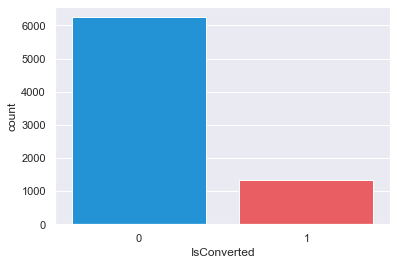

In [33]:
# The target is imbalanced so some resampling will need to take place to train a better model
sns.set(style="darkgrid")
ax = sns.countplot(x="IsConverted", data=df, palette=sns.xkcd_palette(["azure", "light red"]))
plt.show

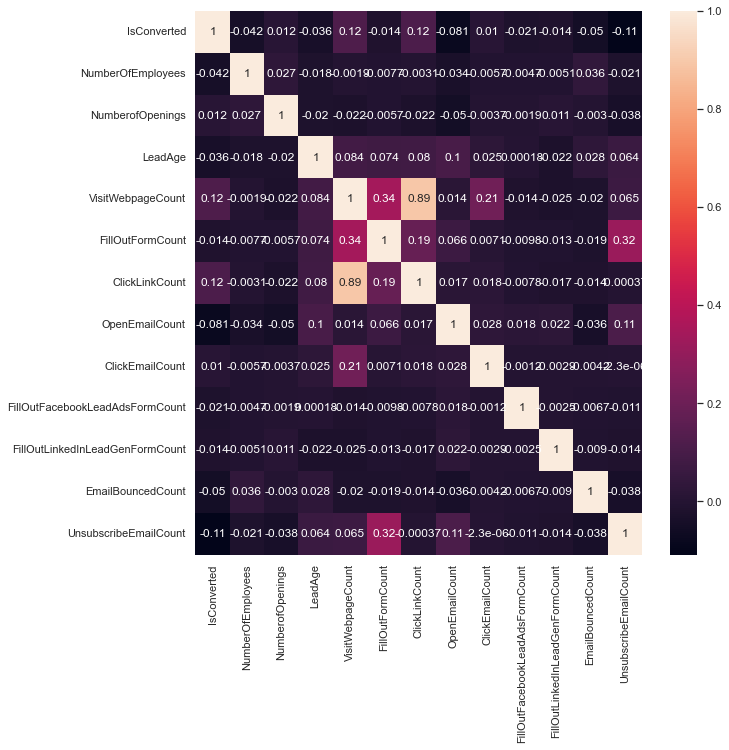

In [34]:
# Correlation for numeric variables
corr_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

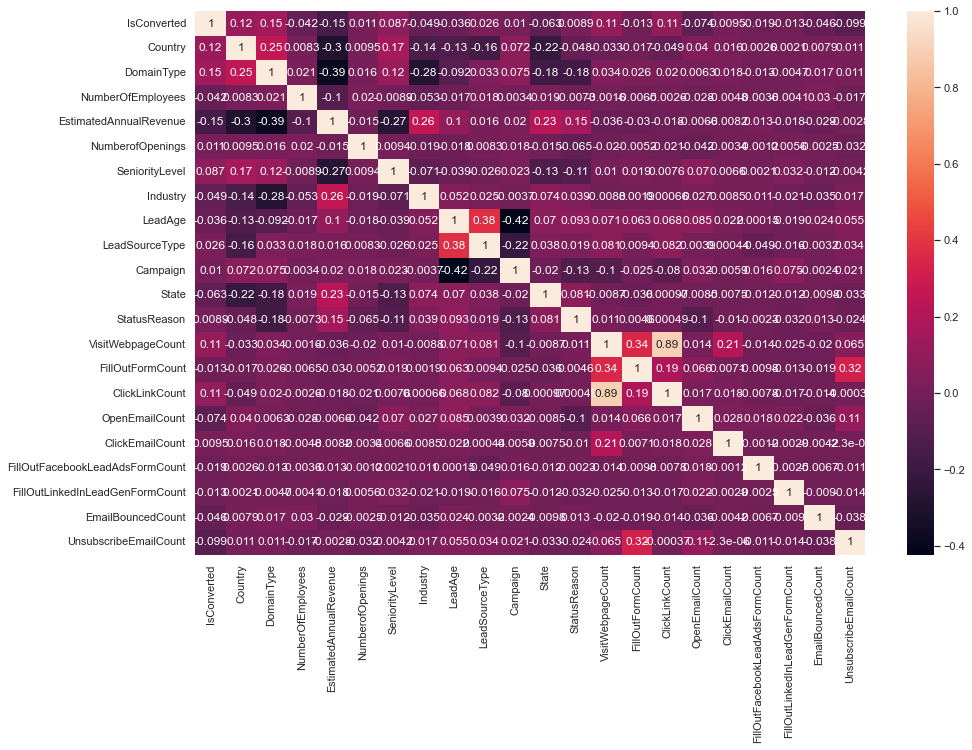

In [35]:
# Full correlation chart
corr_matrix = filled_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Modelling

In [36]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix, recall_score, precision_score
from imblearn.over_sampling import SMOTE


#formatting response & feature data
X = filled_df.drop(['IsConverted'], axis=1)
y = filled_df['IsConverted']

#Splitting data for Test/Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Logistic Regression

In [37]:
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Defining all the parameters
params = {
    'model__penalty': ['l1','l2'],
    'model__C': [0.2,0.5,0.7,1,3,5,7,10]
}

# Model used for the pipeline
model = LogisticRegression()

# Resample and scale/normalize data in pipeline to prevent data leakage
pipe = Pipeline(steps =[
    ('smote', SMOTE(random_state = 42)),
    ('rb_scaler', RobustScaler()),
    ('scaler', StandardScaler()),
    ('model', model)])

#Grid search to look for the best parameters
grid = GridSearchCV(pipe, param_grid=params, scoring='recall', n_jobs=-1, cv=3, verbose=1).fit(X_train, y_train)

print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Training set score: 0.7132429614181439
Test set score: 0.6950904392764858


In [38]:
print('Best Score:', grid.best_score_) 
print('Best Params:', grid.best_params_)

Best Score: 0.6882216562173459
Best Params: {'model__C': 0.2, 'model__penalty': 'l2'}


In [39]:
log_grid = grid.best_estimator_
y_pred_log = log_grid.predict(X_test)

In [40]:
# Calculating metrics
log_acc_score = accuracy_score(y_test, y_pred_log)
log_precision_score = precision_score(y_test, y_pred_log, average='weighted')
log_recall_score = recall_score(y_test, y_pred_log, average='weighted')

print('Model Accuracy:', log_acc_score)
print('Model Precision:', log_precision_score)
print('Model Recall:', log_recall_score)
print(classification_report(y_test, y_pred_log))

Model Accuracy: 0.6537955243527863
Model Precision: 0.8056228561731869
Model Recall: 0.6537955243527863
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1892
           1       0.29      0.70      0.41       387

    accuracy                           0.65      2279
   macro avg       0.60      0.67      0.58      2279
weighted avg       0.81      0.65      0.70      2279



Gradient Boost Classifier

In [21]:
from xgboost import XGBClassifier

# Defining all the parameters
params = {
    'model2__max_depth': (2, 5, 10),
    'model2__n_estimators': (10, 100, 500),
    'model2__learning_rate': [0.1, 0.01, 0.05]
}

# Model used for the pipeline
model2 = XGBClassifier()

# Resample and scale/normalize data in pipeline to prevent data leakage
pipe2 = Pipeline(steps =[
    ('smote', SMOTE(random_state = 42)),
    ('rb_scaler', RobustScaler()),
    ('scaler', StandardScaler()),
    ('model2', model2)])

#Grid search to look for the best parameters
grid2 = GridSearchCV(pipe2, param_grid=params, scoring='recall', n_jobs=-1, cv=3, verbose=1).fit(X_train, y_train)

print('Training set score: ' + str(grid2.score(X_train, y_train)))
print('Test set score: ' + str(grid2.score(X_test, y_test)))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Training set score: 0.9624608967674662
Test set score: 0.9689922480620154


In [41]:
print('Best Score:', grid2.best_score_) 
print('Best Params:', grid2.best_params_)

Best Score: 0.9624542842215256
Best Params: {'model2__learning_rate': 0.1, 'model2__max_depth': 2, 'model2__n_estimators': 10}


In [42]:
xgb_grid = grid2.best_estimator_
y_pred_xgb = xgb_grid.predict(X_test)

In [43]:
# Calculating metrics
xgb_acc_score = accuracy_score(y_test, y_pred_xgb)
xgb_precision_score = precision_score(y_test, y_pred_xgb, average='weighted')
xgb_recall_score = recall_score(y_test, y_pred_xgb, average='weighted')

print('Model Accuracy:', xgb_acc_score)
print('Model Precision:', xgb_precision_score)
print('Model Recall:', xgb_recall_score)
print(classification_report(y_test, y_pred_xgb))

Model Accuracy: 0.9460289600702062
Model Precision: 0.955659734279945
Model Recall: 0.9460289600702062
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1892
           1       0.77      0.97      0.86       387

    accuracy                           0.95      2279
   macro avg       0.88      0.96      0.91      2279
weighted avg       0.96      0.95      0.95      2279



Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Defining all the parameters
params = {
    'model3__max_features': ["sqrt", "log2", None],
    'model3__min_samples_split': [2, 3, 5],
    'model3__n_estimators' :[10,100, 300],
    'model3__criterion': ["entropy", "gini", "log_loss"]
}

# Model used for the pipeline
model3 = RandomForestClassifier(random_state=42)

# Resample and scale/normalize data in pipeline to prevent data leakage
pipe3 = Pipeline(steps =[
    ('smote', SMOTE(random_state = 42)),
    ('rb_scaler', RobustScaler()),
    ('scaler', StandardScaler()),
    ('model3', model3)])

#Grid search to look for the best parameters
grid3 = GridSearchCV(pipe3, param_grid=params, scoring='recall', n_jobs=-1, cv=3, verbose=1).fit(X_train, y_train)

print('Training set score: ' + str(grid3.score(X_train, y_train)))
print('Test set score: ' + str(grid3.score(X_test, y_test)))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Training set score: 1.0
Test set score: 0.9147286821705426


In [45]:
print('Best Score:', grid3.best_score_)
print('Best Params:', grid3.best_params_)
print('Best Estimator:', grid3.best_estimator_)

Best Score: 0.9165817659352142
Best Params: {'model3__criterion': 'entropy', 'model3__max_features': None, 'model3__min_samples_split': 3, 'model3__n_estimators': 300}
Best Estimator: Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('rb_scaler', RobustScaler()), ('scaler', StandardScaler()),
                ('model3',
                 RandomForestClassifier(criterion='entropy', max_features=None,
                                        min_samples_split=3, n_estimators=300,
                                        random_state=42))])


In [46]:
rfc_grid = grid3.best_estimator_
y_pred_rfc = rfc_grid.predict(X_test)

In [47]:
# Calculating metrics
rfc_acc_score = accuracy_score(y_test, y_pred_rfc)
rfc_precision_score = precision_score(y_test, y_pred_rfc, average='weighted')
rfc_recall_score = recall_score(y_test, y_pred_rfc, average='weighted')

print('Model Accuracy:', rfc_acc_score)
print('Model Precision:', rfc_precision_score)
print('Model Recall:', rfc_recall_score)
print(classification_report(y_test, y_pred_rfc))

Model Accuracy: 0.9543659499780606
Model Precision: 0.9568546993811263
Model Recall: 0.9543659499780606
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1892
           1       0.83      0.91      0.87       387

    accuracy                           0.95      2279
   macro avg       0.91      0.94      0.92      2279
weighted avg       0.96      0.95      0.96      2279



Results

In [48]:
result_df = pd.DataFrame(
    [
        ['Logistic Regression', log_acc_score, log_precision_score, log_recall_score, grid.best_score_],
        ['XGBoost', xgb_acc_score, xgb_precision_score, xgb_recall_score, grid2.best_score_],
        ['Random Forest Tree Classifier', rfc_acc_score, rfc_precision_score, rfc_recall_score, grid3.best_score_], 
    ],
    columns= ['Model', 'Accuracy', 'Precision', 'Recall', 'Validation Best Score']
)
result_df['Accuracy'] = result_df['Accuracy']*100
result_df['Precision'] = result_df['Precision']*100
result_df['Recall'] = result_df['Recall']*100
result_df['Validation Best Score'] = result_df['Validation Best Score']*100

In [49]:
result_df

,Model,Accuracy,Precision,Recall,Validation Best Score
0,Logistic Regression,65.379552,80.562286,65.379552,68.822166
1,XGBoost,94.602896,95.565973,94.602896,96.245428
2,Random Forest Tree Classifier,95.436595,95.685470,95.436595,91.658177


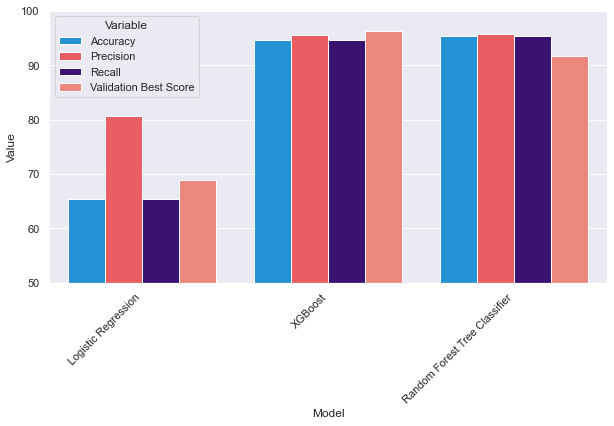

In [50]:
fig, ax1 = plt.subplots(figsize=(10, 5))
tidy = result_df.melt(id_vars='Model').rename(columns=str.title)
sns.barplot(x='Model', y='Value', hue='Variable', data=tidy, ax=ax1, palette=sns.xkcd_palette(["azure", "light red", "indigo", "salmon"]))
plt.ylim(50, 100)
plt.xticks(rotation=45, horizontalalignment="right")
sns.despine(fig)

<AxesSubplot:title={'center':'Confusion Matrix for RFC'}, xlabel='Predicted label', ylabel='True label'>

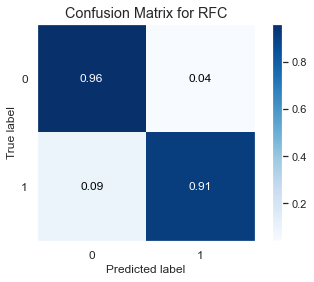

In [52]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rfc, normalize=True, title = 'Confusion Matrix for RFC')

<AxesSubplot:title={'center':'Confusion Matrix for XGB'}, xlabel='Predicted label', ylabel='True label'>

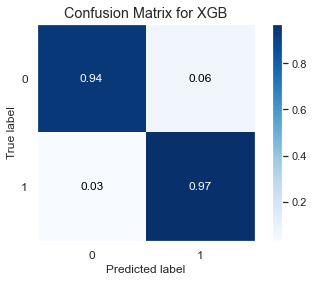

In [53]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_xgb, normalize=True, title = 'Confusion Matrix for XGB')